# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import openweathermapy.core as owm
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Aberdeen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=aberdeen
Processing Record 2 | Viedma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=viedma
Processing Record 3 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=albany
Processing Record 4 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=carnarvon
Processing Record 5 | Nago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=nago
Processing Record 6 | Urucara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=urucara
Processing Record 7 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65

Processing Record 56 | Mayna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=mayna
Processing Record 57 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=okhotsk
Processing Record 58 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=yellowknife
Processing Record 59 | Kualakapuas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=kualakapuas
Processing Record 60 | Hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=hobyo
City not found. Skipping...
City not found. Skipping...
Processing Record 61 | Somerset East
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=somerset east
Processing Record 62 | Puerto Ayora
http://api.openweathermap.org/data/2

Processing Record 112 | Shetpe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=shetpe
Processing Record 113 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=norman wells
Processing Record 114 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=khatanga
Processing Record 115 | Mayumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=mayumba
Processing Record 116 | Veraval
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=veraval
Processing Record 117 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=cabo san lucas
Processing Record 118 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1

Processing Record 167 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=airai
Processing Record 168 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=yar-sale
Processing Record 169 | Pellerd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=pellerd
Processing Record 170 | Luga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=luga
Processing Record 171 | Lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=lompoc
Processing Record 172 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=severo-kurilsk
Processing Record 173 | Shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=shin

Processing Record 222 | Sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=sobolevo
Processing Record 223 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=faya
Processing Record 224 | Fukuma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=fukuma
Processing Record 225 | Barra do Garcas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=barra do garcas
Processing Record 226 | Tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=tura
Processing Record 227 | Traverse City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=traverse city
Processing Record 228 | Whitley Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62

Processing Record 278 | Mollendo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=mollendo
Processing Record 279 | Alta Floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=alta floresta
City not found. Skipping...
Processing Record 280 | Bagdarin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=bagdarin
Processing Record 281 | Chunoyar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=chunoyar
Processing Record 282 | Kysyl-Syr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=kysyl-syr
Processing Record 283 | Inuvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=inuvik
Processing Record 284 | Boissevain
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 333 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=grand gaube
Processing Record 334 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=mount isa
Processing Record 335 | Huambo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=huambo
Processing Record 336 | Baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=baykit
Processing Record 337 | Yining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=yining
Processing Record 338 | Roebourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=roebourne
Processing Record 339 | Kamina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&

Processing Record 388 | Acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=acajutla
City not found. Skipping...
Processing Record 389 | Valdivia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=valdivia
Processing Record 390 | Marmora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=marmora
Processing Record 391 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=bandarbeyla
Processing Record 392 | Buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=buala
Processing Record 393 | Sinop
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=sinop
Processing Record 394 | Vera Cruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5ef

City not found. Skipping...
Processing Record 443 | Damietta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=damietta
Processing Record 444 | Pimentel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=pimentel
Processing Record 445 | Seminole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=seminole
Processing Record 446 | Inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=inta
Processing Record 447 | Fatick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=fatick
Processing Record 448 | Port Hawkesbury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=port hawkesbury
City not found. Skipping...
Processing Record 449 | Bumba
http://api.openweathermap.org/data/2.5/wea

Processing Record 498 | Tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=tateyama
Processing Record 499 | Amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=amapa
Processing Record 500 | Tlapacoyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=tlapacoyan
City not found. Skipping...
Processing Record 501 | Sayyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=sayyan
Processing Record 502 | Jerusalem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=jerusalem
Processing Record 503 | Aasiaat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=aasiaat
Processing Record 504 | Salaga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efb

Processing Record 554 | Pringsewu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=pringsewu
City not found. Skipping...
Processing Record 555 | Ocala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c65f5efbe41769f1bbf62c86e8f9b07&q=ocala


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
city_weather = pd.DataFrame(weatherpy_dict)

In [6]:
# Save data frame to CSV
city_weather.to_csv('city_weather.csv')

# Display data frame head 
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Aberdeen,1,US,1554065605,52,45.47,-98.49,51.01,12.75
1,Viedma,8,AR,1554065738,37,-40.81,-62.99,85.79,9.62
2,Albany,75,US,1554065822,60,42.65,-73.75,46.00,23.04
3,Carnarvon,8,ZA,1554065842,27,-30.97,22.13,64.46,12.19
4,Nago,0,IT,1554065819,63,45.88,10.89,59.00,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

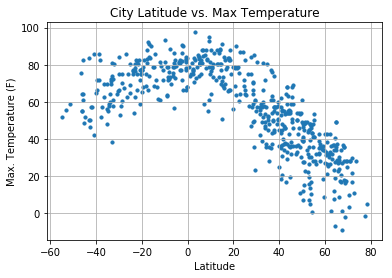

In [8]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

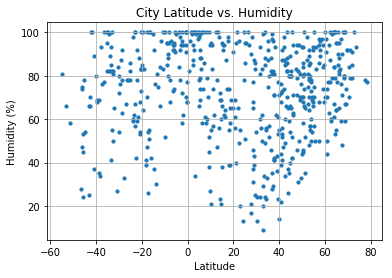

In [9]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

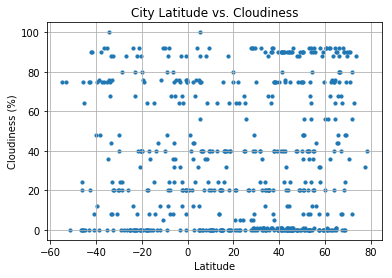

In [10]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

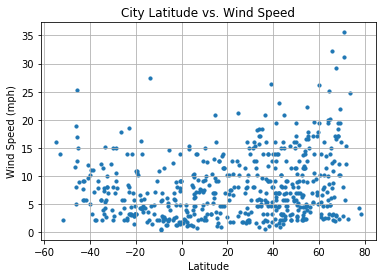

In [11]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

3 Observable Trends:
    
    1.) Closer to the equator it is generally warmer. It is also apparant that in general southern hemisphere cities 
    are on average warmer than northern hemisphere cities.
    
    2.) A cities latitude does not appear to have any real effect on cloudiness or wind speed. The data is pretty 
    evenly spread throughout each latitude.
    
    3.) Humidity does not truely appear to be effected by a cities latitude. If anything you can say that the 
    world is definitely more humid than not. There are far more cities that have 60% or higher humidity than 
    cities below.